In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle

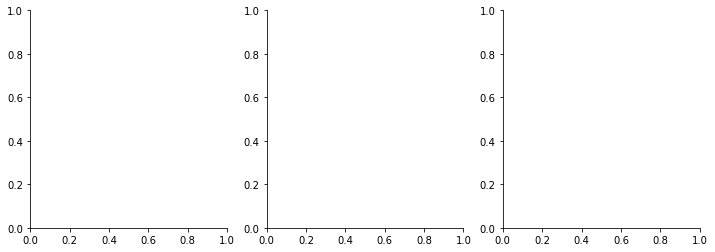

In [85]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4), gridspec_kw={'hspace': 0.2, 'wspace': 0.2})
palette = sns.color_palette('coolwarm', n_colors=5)
plt.rcParams.update({'font.size': 10})
sns.despine(top=True, right=True)
# for ax in axs.flat:
#     ax.legend([],[], frameon=False)

def myplot(kind, axs, title):
    if kind == "lat":
        plot_latency(axs, title)
    if kind == "cpu":
        plot_cpu(axs)
    if kind == "goodput":
        plot_goodput(axs, title)
    if kind == "cpg":
        plot_cpu_per_goodput(axs)

def plot_latency(axs, title):
    results = []
    for e in pq_100:
      results.append([e, "parquet", "100"])
    for e in pq_10:
      results.append([e, "parquet", "10"])
    for e in pq_1:
      results.append([e, "parquet", "1"])
    for e in rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Duration (s)', 'File Format', 'Selectivity (%)'])
    df[['Duration (s)']] = df[['Duration (s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Duration (s)", hue="File Format", data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 200))
    sns_plot.set_title(title)
    fig.savefig('latency_paper.png', dpi=600)


def plot_cpu(axs):
    results = []
    for e in cpu_pq_100:
      results.append([e, "parquet", "100"])
    for e in cpu_pq_10:
      results.append([e, "parquet", "10"])
    for e in cpu_pq_1:
      results.append([e, "parquet", "1"])
    for e in cpu_rpq_100:
      results.append([e, 'rados-parquet', "100"])
    for e in cpu_rpq_10:
      results.append([e, 'rados-parquet', "10"])
    for e in cpu_rpq_1:
      results.append([e, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU Usage (%)', 'File Format', 'Selectivity (%)'])
    df[['CPU Usage (%)']] = df[['CPU Usage (%)']].apply(pd.to_numeric)
    sns.barplot(x="Selectivity (%)", y="CPU Usage (%)", hue="File Format", data=df, ax=axs, palette=palette)
    fig.savefig('cpu_paper.png', dpi=400)


def plot_goodput(axs, title):
    results = []
    for e in pq_100:
      results.append([(154.8/e)*1000, "parquet", "100"])
    for e in pq_10:
      results.append([(15.48/e)*1000, "parquet", "10"])
    for e in pq_1:
      results.append([(1.548/e)*1000, "parquet", "1"])
    for e in rpq_100:
      results.append([(154.8/e)*1000, 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([(15.48/e)*1000, 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([(1.548/e)*1000, 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['Goodput (MB/s)', 'File Format', 'Selectivity (%)'])
    df[['Goodput (MB/s)']] = df[['Goodput (MB/s)']].apply(pd.to_numeric)
    sns_plot = sns.barplot(x="Selectivity (%)", y="Goodput (MB/s)", hue="File Format", data=df, ax=axs, palette=palette)
    sns_plot.set(ylim=(0, 1000))
    sns_plot.set_title(title)
    fig.savefig('goodput_paper.png', dpi=400)


def plot_cpu_per_goodput(axs):
    results = []
    for e in pq_100:
      results.append([ sum(cpu_pq_100)/((154.8/e)*1000) , "parquet", "100"])
    for e in pq_10:
      results.append([ sum(cpu_pq_10)/((15.48/e)*1000) , "parquet", "10"])
    for e in pq_1:
      results.append([ sum(cpu_pq_1)/((1.548/e)*1000) , "parquet", "1"])
    for e in rpq_100:
      results.append([ sum(cpu_rpq_100)/((154.8/e)*1000) , 'rados-parquet', "100"])
    for e in rpq_10:
      results.append([ sum(cpu_rpq_10)/((15.48/e)*1000) , 'rados-parquet', "10"])
    for e in rpq_1:
      results.append([ sum(cpu_rpq_1)/((1.548/e)*1000) , 'rados-parquet', "1"])
    df = pd.DataFrame(np.array(results), columns=['CPU/Goodput', 'File Format', 'Selectivity (%)'])
    df[['CPU/Goodput']] = df[['CPU/Goodput']].apply(pd.to_numeric)
    sns.barplot(x="Selectivity (%)", y="CPU/Goodput", hue="File Format", data=df, ax=axs, palette=palette)
    fig.savefig('cpu_per_goodput_paper.png', dpi=400)

In [73]:
kind="goodput"

In [86]:
# 4 Storage Node, 1 OSD/Node, 16 Threads / Client, 64 MB Files
pq_1 =  [168.35970759391785, 167.43749499320984]
pq_10 =  [174.87274408340454, 174.70416641235352]
pq_100 =  [165.73410844802856, 165.58826351165771]

cpu_pq_100 = [263843.00000000006, 264891.6999999998]
cpu_pq_10 = [270893.1000000001, 275727.4999999999]
cpu_pq_1 = [268909.7, 272758.80000000005]

rpq_1 =  [147.99598908424377, 145.49434685707092]
rpq_10 = [156.6197259426117, 158.82945156097412]
rpq_100 = [199.2479431629181, 202.1522319316864]

cpu_rpq_1 = [197783.5, 191827.69999999998]
cpu_rpq_10 = [203158.60000000003, 210938.00000000006]
cpu_rpq_100 = [266699.50000000006, 266137.20000000007]
myplot(kind, axs[0], "4 OSDs, 16 Threads")

# 8 Storage Node, 1 OSD/Node, 32 Threads / Client, 64 MB Files

rpq_100 =  [178.31854820251465, 176.08191418647766, 175.82852029800415]
rpq_10 =  [100.28986930847168, 108.38310170173645, 110.70559287071228]
rpq_1 =  [93.64431977272034, 89.5289294719696, 99.86775922775269]

pq_100 = [164.4235508441925, 164.21448945999146, 166.64239311218262]
pq_10 = [171.62123465538025, 172.54202485084534]
pq_1 = [166.97980737686157, 166.61639142036438] 
myplot(kind, axs[1], "8 OSDs, 32 Threads")

# 16 Storage Node, 1 OSD/Node, 64 Threads / Client, 64 MB Files

rpq_100 =  [186.96529054641724, 181.93869733810425]
rpq_10 =  [47.7777624130249, 48.2372522354126]
rpq_1 = [43.84521508216858, 45.833160161972046]

pq_100 =  [177.6786870956421, 180.38822317123413]
pq_10 =  [182.4313941001892, 184.1520962715149]
pq_1 =  [177.76280212402344, 179.04515767097473]

cpu_rpq_100 = [282402.4000000001, 300565.5]
cpu_rpq_10 = [185665.19999999995, 186640.59999999995]
cpu_rpq_1 = [185102.3, 184939.39999999994]

cpu_pq_100 = [296501.8000000001, 281438.0999999999]
cpu_pq_10 = [303661.29999999993, 298839.0000000001]
cpu_pq_1 = [295033.29999999993, 295036.8999999999]
myplot(kind, axs[2], "16 OSDs, 64 Threads")